In [30]:
import cv2 

# img = cv2.imread('/home/likcos/DataSets/sportimages/sportimages/basket/basket2_0001.jpg')
# print(img.shape[0], img.shape[1], img.shape[2], len(img.shape))

# Convolutional Neural Networks

# Importar Librerías

In [31]:
import numpy as np
import os
import re
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [32]:
import keras
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential,Model
from tensorflow.keras.layers import Input
from keras.layers import Dense, Dropout, Flatten
#from keras.layers import Conv2D, MaxPooling2D
#from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    BatchNormalization, SeparableConv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense, Conv2D
)
from keras.layers import LeakyReLU

# Cargar set de Imágenes

In [33]:
dirname = os.path.join(os.getcwd(),'./datasets')
imgpath = dirname + os.sep 

images = []
directories = []
dircount = []
prevRoot=''
cant=0

print("leyendo imagenes de ",imgpath)

for root, dirnames, filenames in os.walk(imgpath):
    for filename in filenames:
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            cant=cant+1
            filepath = os.path.join(root, filename)
            image = plt.imread(filepath)
            if(len(image.shape)==3):
                
                images.append(image)
            b = "Leyendo..." + str(cant)
            print (b, end="\r")
            if prevRoot !=root:
                print(root, cant)
                prevRoot=root
                directories.append(root)
                dircount.append(cant)
                cant=0
dircount.append(cant)

dircount = dircount[1:]
dircount[0]=dircount[0]+1
print('Directorios leidos:',len(directories))
print("Imagenes en cada directorio", dircount)
print('suma Total de imagenes en subdirs:',sum(dircount))

leyendo imagenes de  d:\DocumentosHDD\9no_Semestre\Inteligencia Artificial\IA\./datasets\
d:\DocumentosHDD\9no_Semestre\Inteligencia Artificial\IA\./datasets\aves 1


d:\DocumentosHDD\9no_Semestre\Inteligencia Artificial\IA\./datasets\cempsuchs 3256
d:\DocumentosHDD\9no_Semestre\Inteligencia Artificial\IA\./datasets\lavanda 3330
d:\DocumentosHDD\9no_Semestre\Inteligencia Artificial\IA\./datasets\pass 1628
d:\DocumentosHDD\9no_Semestre\Inteligencia Artificial\IA\./datasets\tulips 1480
Directorios leidos: 5
Imagenes en cada directorio [3257, 3330, 1628, 1480, 3366]
suma Total de imagenes en subdirs: 13061


# Creamos las etiquetas

In [34]:
labels=[]
indice=0
for cantidad in dircount:
    for i in range(cantidad):
        labels.append(indice)
    indice=indice+1
print("Cantidad etiquetas creadas: ",len(labels))


Cantidad etiquetas creadas:  13061


In [35]:
flores=[]
indice=0
for directorio in directories:
    name = directorio.split(os.sep)
    print(indice , name[len(name)-1])
    flores.append(name[len(name)-1])
    indice=indice+1

0 aves
1 cempsuchs
2 lavanda
3 pass
4 tulips


In [36]:
y = np.array(labels)
X = np.array(images, dtype=np.uint8) #convierto de lista a numpy



# Find the unique numbers from the train labels
classes = np.unique(y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  5
Output classes :  [0 1 2 3 4]


# Creamos Sets de Entrenamiento y Test

In [37]:
train_X,test_X,train_Y,test_Y = train_test_split(X,y,test_size=0.2)
print('Training data shape : ', train_X.shape, train_Y.shape)
print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (10448, 32, 32, 3) (10448,)
Testing data shape :  (2613, 32, 32, 3) (2613,)


Text(0.5, 1.0, 'Ground Truth : 4')

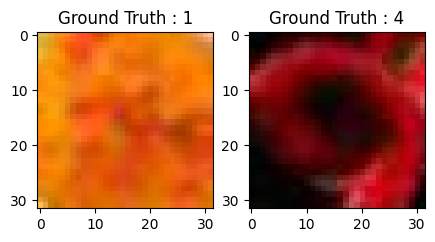

In [38]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

# Preprocesamos las imagenes

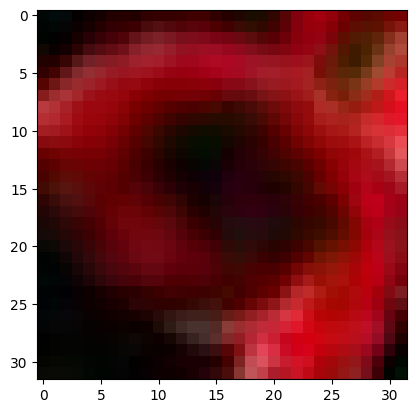

In [39]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X/255.
test_X = test_X/255.
plt.imshow(test_X[0,:,:])

## Hacemos el One-hot Encoding para la red

In [40]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 1
After conversion to one-hot: [0. 1. 0. 0. 0.]


# Creamos el Set de Entrenamiento y Validación

In [41]:
#Mezclar todo y crear los grupos de entrenamiento y testing
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

In [42]:
print(train_X.shape,valid_X.shape,train_label.shape,valid_label.shape)

(8358, 32, 32, 3) (2090, 32, 32, 3) (8358, 5) (2090, 5)


# Creamos el modelo de CNN

In [43]:
#declaramos variables con los parámetros de configuración de la red
INIT_LR = 1e-3 # Valor inicial de learning rate. El valor 1e-3 corresponde con 0.001
epochs = 200 # Cantidad de iteraciones completas al conjunto de imagenes de entrenamiento
batch_size = 32 # cantidad de imágenes que se toman a la vez en memoria

In [44]:
flower_model = Sequential()
flower_model.add(Conv2D(16, kernel_size=(5, 5),activation='linear',padding='same',input_shape=(32,32,3)))
flower_model.add(LeakyReLU(alpha=0.1))
flower_model.add(MaxPooling2D((2, 2),padding='same'))
flower_model.add(Dropout(0.5))

flower_model.add(Flatten())
flower_model.add(Dense(32, activation='linear'))
flower_model.add(LeakyReLU(alpha=0.1))
flower_model.add(Dropout(0.5))
flower_model.add(Dense(nClasses, activation='softmax'))

In [45]:
flower_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 32, 32, 16)        1216      
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 32, 32, 16)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 16)        0         
 g2D)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 16, 16, 16)        0         
                                                                 
 flatten_1 (Flatten)         (None, 4096)              0         
                                                                 
 dense_2 (Dense)             (None, 32)                131104    
                                                      

In [46]:
flower_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.legacy.SGD(learning_rate=INIT_LR, decay=INIT_LR / 100),metrics=['accuracy'])

# Entrenamos el modelo: Aprende a clasificar imágenes

In [47]:
# este paso puede tomar varios minutos, dependiendo de tu ordenador, cpu y memoria ram libre
flower_train = flower_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Epoch 1/200
262/262 [==============================] - 3s 8ms/step - loss: 1.5183 - accuracy: 0.3197 - val_loss: 1.2978 - val_accuracy: 0.4986
Epoch 2/200
262/262 [==============================] - 2s 7ms/step - loss: 1.2901 - accuracy: 0.4471 - val_loss: 1.1512 - val_accuracy: 0.5517
Epoch 3/200
262/262 [==============================] - 2s 7ms/step - loss: 1.2061 - accuracy: 0.4880 - val_loss: 1.0868 - val_accuracy: 0.5919
Epoch 4/200
262/262 [==============================] - 2s 7ms/step - loss: 1.1539 - accuracy: 0.5039 - val_loss: 1.0432 - val_accuracy: 0.6100
Epoch 5/200
262/262 [==============================] - 2s 7ms/step - loss: 1.1212 - accuracy: 0.5223 - val_loss: 1.0081 - val_accuracy: 0.6134
Epoch 6/200
262/262 [==============================] - 2s 7ms/step - loss: 1.0876 - accuracy: 0.5319 - val_loss: 0.9746 - val_accuracy: 0.6187
Epoch 7/200
262/262 [==============================] - 2s 7ms/step - loss: 1.0629 - accuracy: 0.5500 - val_loss: 0.9515 - val_accuracy: 0.6383

In [48]:
# guardamos la red, para reutilizarla en el futuro, sin tener que volver a entrenar
flower_model.save("./flores.h5py")

INFO:tensorflow:Assets written to: ./flores.h5py\assets


INFO:tensorflow:Assets written to: ./flores.h5py\assets


# Evaluamos la red

In [49]:
test_eval = flower_model.evaluate(test_X, test_Y_one_hot, verbose=1)

82/82 [==============================] - 0s 3ms/step - loss: 0.2256 - accuracy: 0.9273


In [50]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.22562940418720245
Test accuracy: 0.9272866249084473


In [51]:
flower_model.history

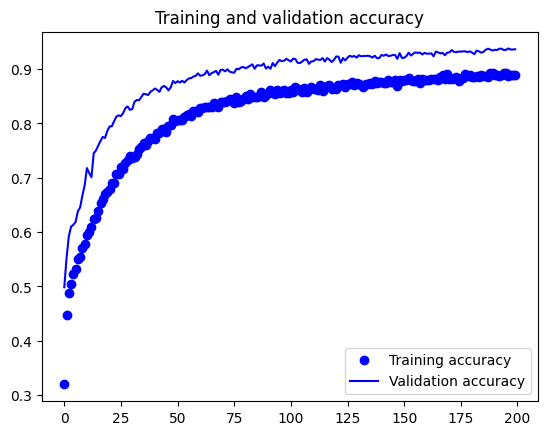

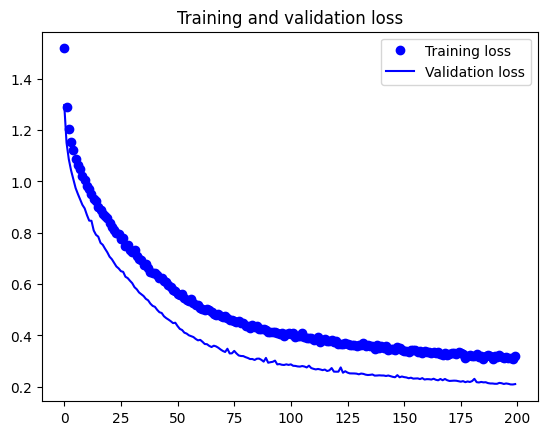

In [52]:
accuracy = flower_train.history['accuracy']
val_accuracy = flower_train.history['val_accuracy']
loss = flower_train.history['loss']
val_loss = flower_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [53]:
predicted_classes2 = flower_model.predict(test_X)

82/82 [==============================] - 0s 5ms/step


In [54]:
predicted_classes=[]
for predicted_flower in predicted_classes2:
    predicted_classes.append(predicted_flower.tolist().index(max(predicted_flower)))
predicted_classes=np.array(predicted_classes)

In [55]:
predicted_classes.shape, test_Y.shape

((2613,), (2613,))

# Aprendamos de los errores: Qué mejorar

Found 2423 correct labels


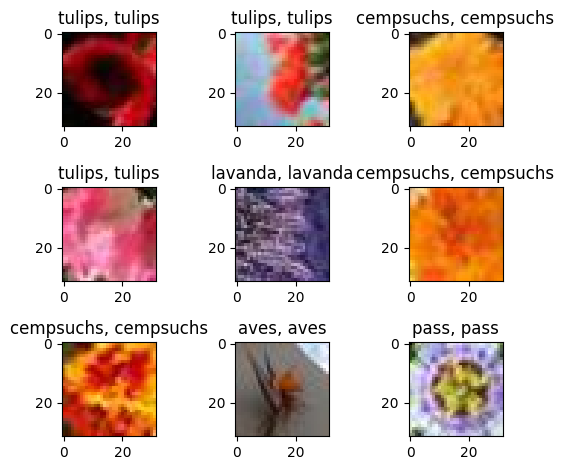

In [56]:
correct = np.where(predicted_classes==test_Y)[0]
print("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(32,32,3), cmap='gray', interpolation='none')
    plt.title("{}, {}".format(flores[predicted_classes[correct]],
                                                    flores[test_Y[correct]]))

    plt.tight_layout()

Found 190 incorrect labels


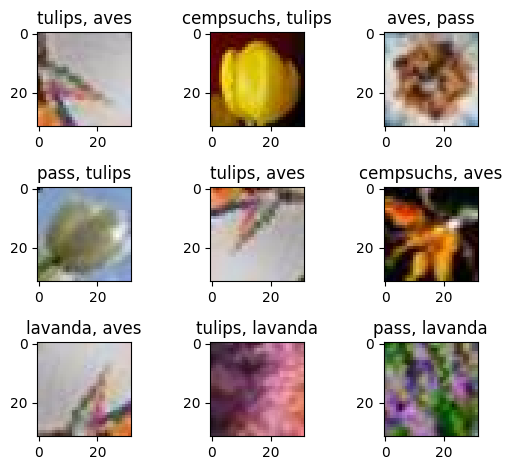

In [57]:
incorrect = np.where(predicted_classes!=test_Y)[0]
print("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(32,32,3), cmap='gray', interpolation='none')
    plt.title("{}, {}".format(flores[predicted_classes[incorrect]],
                                                    flores[test_Y[incorrect]]))
    plt.tight_layout()

In [58]:
target_names = ["Class {}".format(i) for i in range(nClasses)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.94      0.93      0.94       633
     Class 1       0.95      0.97      0.96       647
     Class 2       0.94      0.93      0.93       337
     Class 3       0.85      0.95      0.90       300
     Class 4       0.93      0.87      0.90       696

    accuracy                           0.93      2613
   macro avg       0.92      0.93      0.93      2613
weighted avg       0.93      0.93      0.93      2613

